**GLAVNI CILJI**
  
1. Uspesno napovedat rezultat strela na gol glede na pozicijo, kjer se igralec odloci za strel
2. Tezave s koncentracijo
    - v kateri minuti tekme se naredi najvec tehnicnih napak
     - katera ekipa dela najvec in katera najmanj tehnicnih napak
3. pogrupirat ekipe glede na:
        - napad (najvec strelov na gol, najvec narjenih 7m, najvec narjenih faulov nad njimi, najvec golov in asistenc)
        - obrambo (fauli, najmanj golov, najmanj narjenih penalov, najvec obramb, bloki)
        - napake (2min-, blok-, 7m-, koraki-, zoga-, rumen,rdec karton, moder karton, sterel zgreseno)
        - fairplay (7m, rumen, rdec karto, moder)
        - uspesnost (st povprecnih tock na tekmo)

Bonus: Analizirat klub RK Dobova, v primerjavi z ostalimi klubi lige


**ZA NARDIT**  
  
0. polepsaj podatke - nalozi, brisi, ime priimek, naredi IDje DONE
1. Povezat igralce z ekipami DONE
2. Pripravit matriko za napoved golov
3.  - pripravi kolicnik - fairplay, napad, obrambo, uspesnost, napake

# 1. Moška rokometna liga slovenije

<h2>Branje in urejanje podatkov </h2>

Uvozi knjižnice

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

Uvoz podatkov iz excel tabel, naloži le uporabne stolpce

In [2]:
tekme = pd.read_excel('podatki/tabele.xlsx', sheet_name="Tekme")
akcije = pd.read_excel('podatki/tabele.xlsx', sheet_name="Igralci akcije", usecols="A,E:K")


Iz zgoščenih IDjev igralcev naredi berljive IDje 

In [3]:
unikat_igralci = akcije['ID Igralca'].unique()

enum_igralci = {}
for n,i in enumerate(unikat_igralci):
    enum_igralci[i]=n

igralciID = []

for i in akcije['ID Igralca']:
    igralciID.append(enum_igralci[i])
    
akcije["ID Igralca"] = igralciID

Poimenuj vse ekipe

In [4]:
unikat_ekipe = tekme['Domača ekipa'].unique()

enum_ekipe = {}
for n,i in enumerate(unikat_ekipe):
    enum_ekipe[i]=n
    
enum_ekipe

{'RK SLOVENJ GRADEC 2011': 0,
 'RK TRIMO TREBNJE': 1,
 'RD BUTAN PLIN IZOLA': 2,
 'RK DOBOVA': 3,
 'RD URBANSCAPE LOKA': 4,
 'MRK KRKA': 5,
 'RD RIKO RIBNICA': 6,
 'RK GORENJE VELENJE': 7,
 'RD KOPER': 8,
 'RK CELJE PIVOVARNA LAŠKO': 9,
 'RK JERUZALEM ORMOŽ': 10,
 'RK MARIBOR BRANIK': 11,
 'MRK LJUBLJANA': 12,
 'RD LL GROSIST SLOVAN': 13,
 'RK SVIŠ IVANČNA GORICA': 14,
 'RD HERZ ŠMARTNO': 15}

Preveri ali se ujemajo id tekem iz obeh tabel

In [5]:
tekme_uni = tekme["id tekme"].unique()
akcije_tekme_uni = akcije["ID tekme"].unique()

print(tekme_uni.shape)
print(akcije_tekme_uni.shape)


#Opazim da je v eni tabeli 5 vec zabelezenih tekem, ki jih bo potrebno izbrisati 
for i in tekme["id tekme"].unique():
    if i not in akcije["ID tekme"].unique():
        tekme.drop(tekme.loc[tekme["id tekme"]==i].index, inplace=True)



(438,)
(433,)


Igralce poveži z ekipo

In [6]:
clani_ekipe = collections.defaultdict(list)

for i in range(len(unikat_igralci)):
    unikat_tekme = akcije[akcije["ID Igralca"]==i]["ID tekme"].unique()
    prava = tekme[tekme["id tekme"]== unikat_tekme[0]]["Domača ekipa"].values[0]
    fake = tekme[tekme["id tekme"]== unikat_tekme[0]]["Gsotujoca ekipa"].values[0]
    for j in range(1,3,1):
        try:
            if (prava == tekme[tekme["id tekme"]== unikat_tekme[j]]["Domača ekipa"].values[0] or prava == tekme[tekme["id tekme"]== unikat_tekme[j]]["Gsotujoca ekipa"].values[0]):
                continue
            elif (fake == tekme[tekme["id tekme"]== unikat_tekme[j]]["Domača ekipa"].values[0] or fake == tekme[tekme["id tekme"]== unikat_tekme[j]]["Gsotujoca ekipa"].values[0]):
                prava = fake
                fake = ""
            else:
                continue
#                 print("Menjal ekipo")
        except:
              continue
#             print("Manj kot 3 tekme")
    clani_ekipe[prava].append(i) 
    
#Igralci, ki imajo manj kot 3 tekme igrajo po navadi na domačih tleh, 
#saj gre za igralce mlajših kategorij, ki so dobili priložnost za igro pred domačimi navijači.
#Take igralce pripišem domači ekipi

#Igralcem, ki so zaigrali na dveh različnih tekmah s štirimi različnimi ekipami ni mogoče natančno pripisati ekipe,
#zato sem jim pripisar kar zadnjo domačo ekipo, saj je najverjetneje, da je to njihov aktualni klub.


Pripiši ekipo vsem akcijam s pomočjo id igralca

In [7]:
ekipe_akcije = []
ekipe_id = []
for row in akcije["ID Igralca"]:
    for k,v in clani_ekipe.items():
        if row in v:
            ekipe_akcije.append(k)
            ekipe_id.append(enum_ekipe[k])
            break
            
akcije["Ekipa"] = ekipe_akcije
akcije["ID ekipa"] = ekipe_id
akcije
# akcije.to_excel("akcije.xlsx", index = False)

,ID Igralca,ID tekme,Čas tekem (sek),Akcija tekme,Akcijatekme Dva,Pozicija strela start,Pozicija strela end,Vrsta napada,Ekipa,ID ekipa
0,0,184783,64,Rum. karton,NaN,NaN,NaN,NaN,RD RIKO RIBNICA,6
1,1,184783,71,7M,ZADETEK,NaN,NaN,NaN,RK SLOVENJ GRADEC 2011,0
2,2,184783,71,7M -Vratar,ZADETEK,NaN,NaN,NaN,RD RIKO RIBNICA,6
3,1,184783,109,Strel na gol,ZADETEK,NaN,NaN,NaN,RK SLOVENJ GRADEC 2011,0
4,2,184783,109,Strel na gol - Vratar,ZADETEK,NaN,NaN,NaN,RD RIKO RIBNICA,6
...,...,...,...,...,...,...,...,...,...,...
80343,404,194838,3600,Strel na gol,OBRAMBA,8.0,13.0,POSTAVLJENA OBRAMBA,RK CELJE PIVOVARNA LAŠKO,9
80344,268,194838,3600,Strel na gol - Vratar,OBRAMBA,8.0,13.0,POSTAVLJENA OBRAMBA,MRK LJUBLJANA,12
80345,268,194838,3600,Strel na gol - Vratar,ZADETEK,3.0,8.0,POSTAVLJENA OBRAMBA,MRK LJUBLJANA,12
80346,73,194838,3600,Strel na gol,ZADETEK,3.0,8.0,POSTAVLJENA OBRAMBA,RK CELJE PIVOVARNA LAŠKO,9


Vizualizacija števila akcij na ekipo

Text(0.5, 0, 'Število akcij')

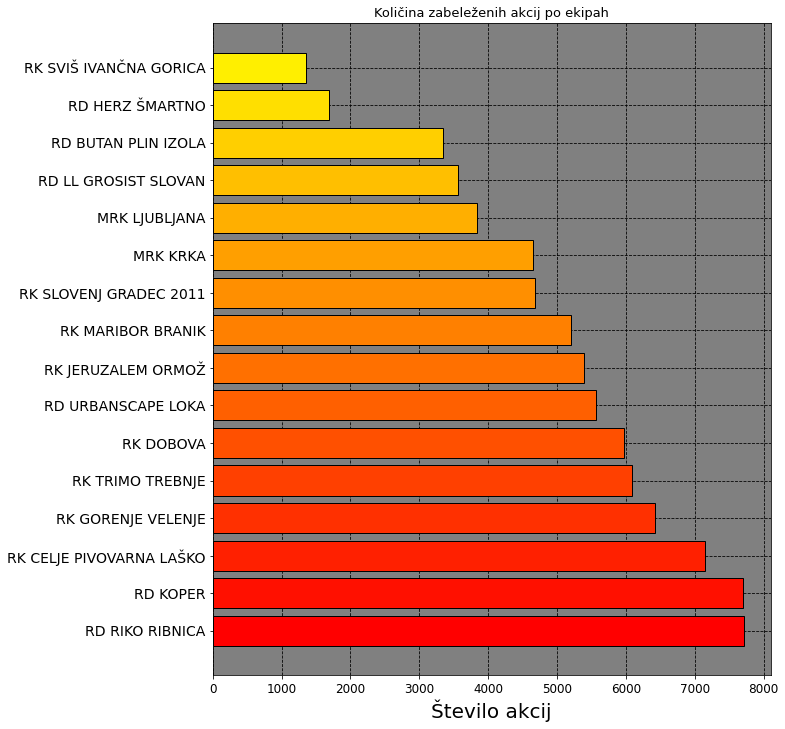

In [8]:
barve = [(1,0+i/10000,0) for i in range(0,10000,625)]
ekipa_st_akcij = {}

for k,v in enum_ekipe.items():
    ekipa_st_akcij[k] = len(akcije[akcije["ID ekipa"]==v])

ekipa_st_akcij_S = dict(sorted(ekipa_st_akcij.items(), key=lambda item: item[1],reverse=True))     
plt.figure(figsize=(10,12))
ax = plt.axes()
ax.set_axisbelow(True)
ax.grid(color='black', linestyle='dashed')
ax.set_facecolor("grey")
plt.barh(list(ekipa_st_akcij_S.keys()), ekipa_st_akcij_S.values(),  color=barve ,  edgecolor='black')
plt.xticks(fontsize=12 )
plt.yticks(fontsize=14 )
plt.title("Količina zabeleženih akcij po ekipah", size=13)
plt.xlabel('Število akcij', size=20)